In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics


In [2]:
dataset=pd.read_excel('학습용데이터좌표추가.xlsx')

data = pd.DataFrame(dataset)

data['sex']=data['sex'].map({"남성": 0, "여성":1, "혼성":2})
encoder=LabelEncoder()
gu_encoded=encoder.fit_transform(data['gu'])
dong_encoded=encoder.fit_transform(data['dong'])
data['gu']=gu_encoded
data['dong']=dong_encoded

#feature
#X= data[ ['branch_code','room_size','sex','gu','dong','deposite','month_bill','subway_dist','bus_dist','uni-dist','hospital','pharmacy','gym','library','police','park','rate']]
X= data[ ['subway_dist','bus_dist','uni-dist','hospital','pharmacy','gym','library','police','park','rate']]

X.head()


,subway_dist,bus_dist,uni-dist,hospital,pharmacy,gym,library,police,park,rate
0,0.427529,232.471912,1.383422,1.832531,0.035272,0.281729,0.252453,1.480013,0.33478,0.0
1,0.427529,232.471912,1.383422,1.832531,0.035272,0.281729,0.252453,1.480013,0.33478,0.0
2,0.427529,232.471912,1.383422,1.832531,0.035272,0.281729,0.252453,1.480013,0.33478,0.0
3,0.427529,232.471912,1.383422,1.832531,0.035272,0.281729,0.252453,1.480013,0.33478,0.0
4,0.427529,232.471912,1.383422,1.832531,0.035272,0.281729,0.252453,1.480013,0.33478,0.0


In [3]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [4]:
#create model and prediction
db = DBSCAN(eps=0.7,min_samples=24)##########################################
predict = pd.DataFrame(db.fit_predict(X_normalized))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([X_normalized,predict],axis=1)

#print n_cluster n_noise
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print(r)

Estimated number of clusters: 8
Estimated number of noise points: 258
            0         1         2         3         4         5         6  \
0   -0.019481  0.324450  0.177897  0.115583 -0.247354 -0.474415 -0.284763   
1   -0.019481  0.324450  0.177897  0.115583 -0.247354 -0.474415 -0.284763   
2   -0.019481  0.324450  0.177897  0.115583 -0.247354 -0.474415 -0.284763   
3   -0.019481  0.324450  0.177897  0.115583 -0.247354 -0.474415 -0.284763   
4   -0.019481  0.324450  0.177897  0.115583 -0.247354 -0.474415 -0.284763   
..        ...       ...       ...       ...       ...       ...       ...   
907 -0.280348  0.110408  0.479337 -0.148818  0.011250 -0.266549 -0.467869   
908 -0.010327  0.083673 -0.277317  0.123835  0.586110  0.079221  0.460334   
909 -0.010327  0.083673 -0.277317  0.123835  0.586110  0.079221  0.460334   
910 -0.010327  0.083673 -0.277317  0.123835  0.586110  0.079221  0.460334   
911 -0.010327  0.083673 -0.277317  0.123835  0.586110  0.079221  0.460334   

     

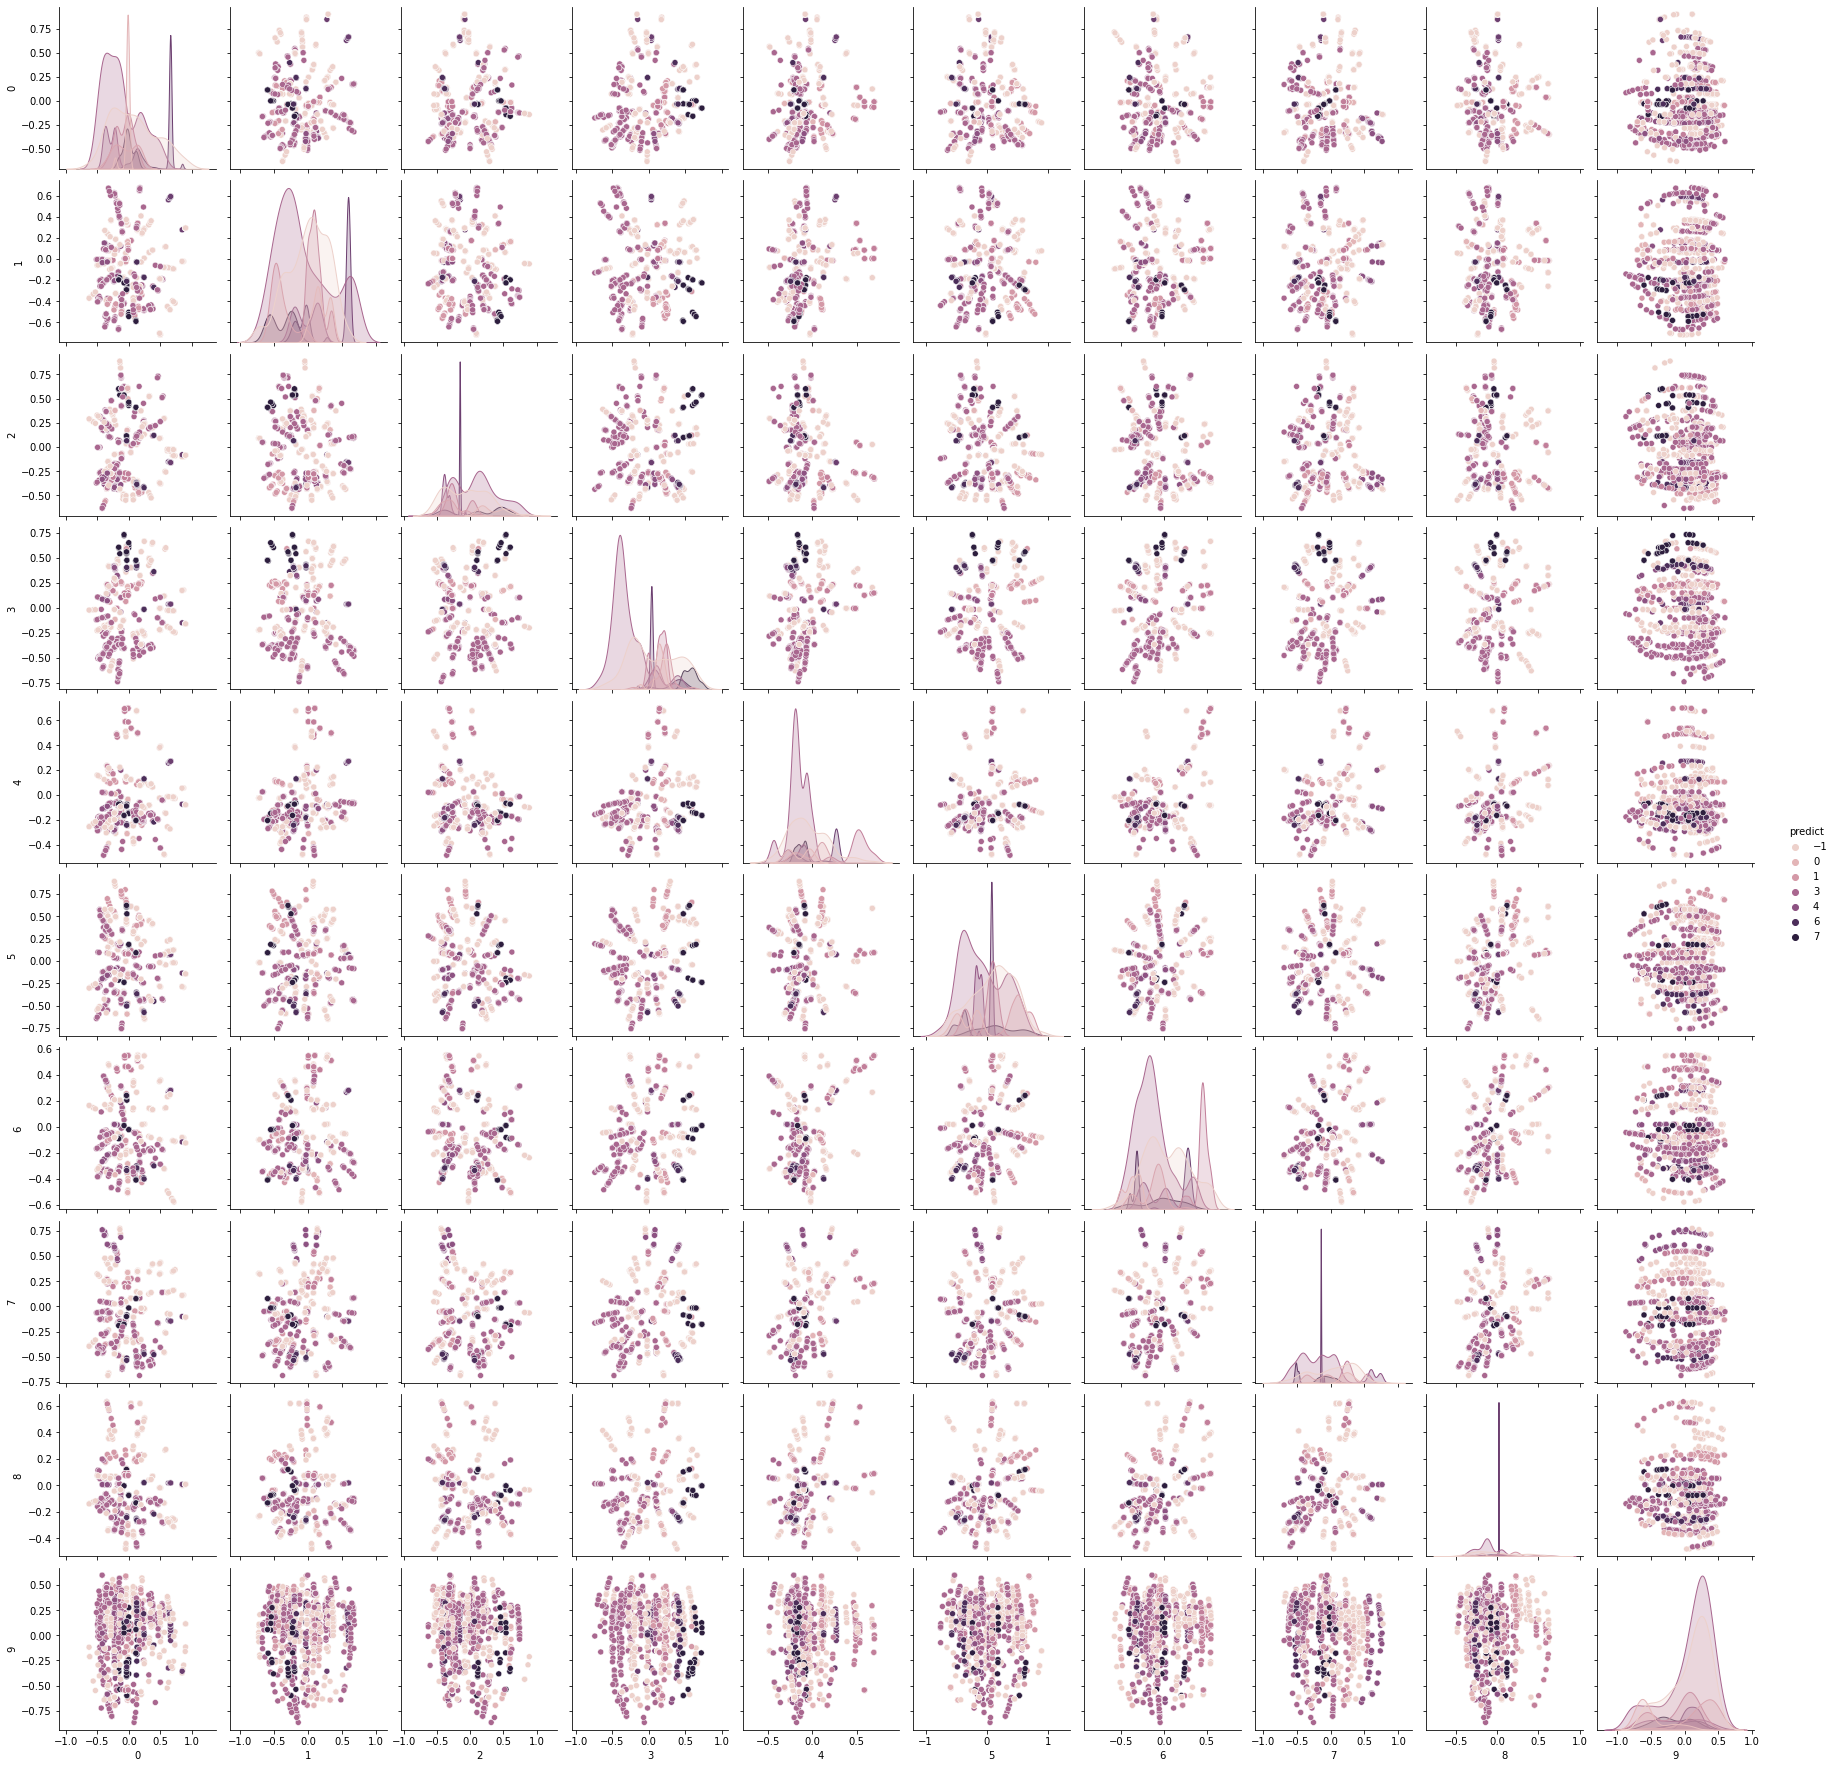

In [156]:
#sns.pairplot(r,hue='predict',palette="Blues")
sns.pairplot(r,hue='predict')
plt.show()

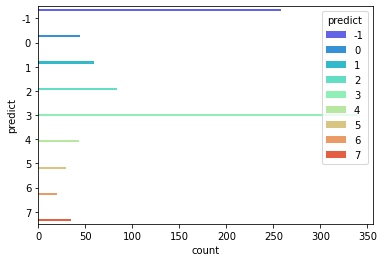

In [6]:
#visualization n_predict
sns.countplot(y="predict",hue='predict',data=r, palette="rainbow")
plt.show()

         P1        P2
0 -0.237933 -0.795984
1 -0.237933 -0.795984
2 -0.237933 -0.795984
3 -0.237933 -0.795984
4 -0.237933 -0.795984


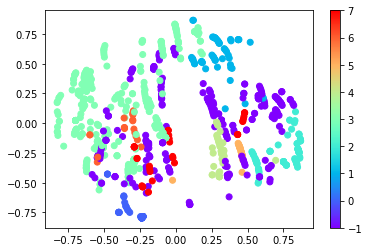

In [7]:
#visualization 2d
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 
plt.scatter(x=X_principal['P1'],y=X_principal['P2'],c=r['predict'],cmap="rainbow")
plt.colorbar()

         P1        P2        P3
0 -0.237933 -0.795984  0.082569
1 -0.237933 -0.795984  0.082569
2 -0.237933 -0.795984  0.082569
3 -0.237933 -0.795984  0.082569
4 -0.237933 -0.795984  0.082569


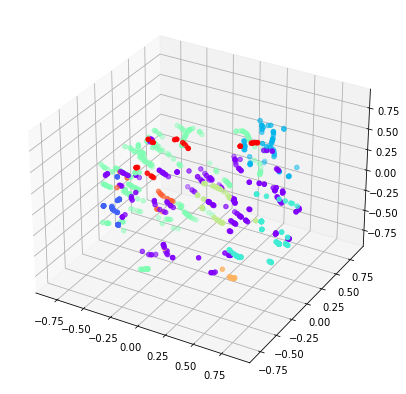

In [8]:
#visualization 3d
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
print(X_principal.head()) 

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_principal['P1'],X_principal['P2'], X_principal['P3'],c=r['predict'],cmap=plt.cm.rainbow)

In [ ]:
#estimate hyperparameter using silhouette score
#이거돌리면안됨 테스트용
range_min = [x for x in range(5, 30, 1)]

range_eps = [y for y in np.arange(0.01, 10, 0.01)]

start = time.time() 

for m in range_min:

    for e in range_eps:
        model = DBSCAN(eps = e, min_samples = m).fit(X_normalized)
        core_samples_mask = np.zeros_like(model.labels_, dtype = bool)
        core_samples_mask[model.core_sample_indices_] = True
        labels = model.labels_
        
        if len(set(labels)) - (1 if -1 in labels else 0) > 1: #cluster>1
            silhouette_Avg = silhouette_score(X_normalized, labels)
            if silhouette_Avg > 0.3:
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise_ = list(labels).count(-1)
                if n_clusters_< 15:
                    print("min-sample value : " + str(m) + " eps value : " + str(e) , "silhouette_score average : ", silhouette_Avg)
                    print("clusters : " + str(n_clusters_) +" noise points : " + str(n_noise_))

print("time :", time.time() - start)

In [9]:
## XlsxWriter 엔진으로 Pandas writer 객체 만들기
output=pd.read_excel('학습용데이터좌표추가.xlsx')
writer = pd.ExcelWriter('predict.xlsx', engine='xlsxwriter')
output=pd.concat([output, predict],axis=1)
print(output)

 
## DataFrame을 xlsx에 쓰기
with open('df.json', 'w', encoding='utf-8') as file:
    output.to_json('predict.json', orient='records', force_ascii=False)

## Pandas writer 객체 닫기
writer.close()

    bed_code  branch_code  room_size sex   gu   dong  deposite  month_bill  \
0       D2A1            0          1  여성  성동구  성수동1가    820000      410000   
1       D2B1            0          1  여성  성동구  성수동1가    580000      290000   
2       D2C1            0          2  여성  성동구  성수동1가    560000      280000   
3       D2C2            0          2  여성  성동구  성수동1가    560000      280000   
4       D2D1            0          2  여성  성동구  성수동1가    680000      340000   
..       ...          ...        ...  ..  ...    ...       ...         ...   
907    164M1          164          1  혼성  성동구  성수동1가   5000000      570000   
908    165A1          165          1  여성   중구  장충동2가   1100000      470000   
909    165B1          165          1  여성   중구  장충동2가   1100000      470000   
910    165C1          165          2  여성   중구  장충동2가    860000      350000   
911    165C2          165          2  여성   중구  장충동2가    860000      350000   

     subway_dist    bus_dist  ...  hospital  pharmacy       gym